# Least Squares  Polynomial Fitting (0.9 points)

## Introduction

As discussed during Week 2, one can use linear regression to fit a nonlinear function to data via a nonlinear embedding function $\phi: \mathbb{R}^D \rightarrow \mathbb{R}^D \times \mathbb{R}^K$. One can then express a nonlinear function as an inner product:
$$f(\mathbf{\mathbf{x}}) = \langle \mathbf{w}, \phi(\mathbf{x})\rangle $$

In this assignment, we consider the case of an embedding function that takes a point $\mathbf{x}\in \mathbb{R}^D$ to a $D\times K+1$-dimensional space using the following expression:

$$\phi_K(\mathbf{x}) = \left[\begin{array}{c}\mathbf{1} & \mathbf{x} & \mathbf{x}^2 & \ldots & \mathbf{x}^K \end{array}\right]$$

We will be treating $K$ as a hyper-parameter, i.e. we will not try to estimate $K$, but will rather explore the effect of changing its values. 

Using this embedding function allows us to express a $K$-th order polynomial in terms of an inner product:

$$ f_K(\mathbf{x}) =  \langle \mathbf{w}_K, \phi_K(\mathbf{x})\rangle = w_0 + w_1 \mathbf{x} + w_2 \mathbf{x}^2 + \ldots + x_K \mathbf{x}^K $$


If the quality of the approximation on point set $\mathcal{S}$ is measured in terms of the quadratic loss:
\begin{equation}
E(f,\mathcal{S}) = \sum_i ||\mathbf{y}_i - f_K(\mathbf{x}_i)||^2,
\end{equation}
we can then find the optimal parameters $\mathbf{w}_K$ of $f_K$ using the least squares formula derived in class.


## Assignment

We first use the function `pickle.load` to load the dataset from the file `data_pol_fit.pkl`, and then display the training and test sets. 

This dataset is made of input-output pairs $\mathcal{S} = \{(x_i,y_i)\}$ where $x_i, y_i \in \mathbb{R}^D$ with $D=1$, and $1\leq i \leq 30$. 
Your task is to estimate a function $f:\mathbb{R}^D\rightarrow \mathbb{R}^D$ that can accurately approximate the underlying input-output mapping. Even though $D=1$ in the dataset, your code should work for any dimension of the input space.


1. (.4/.9) Fill in the necessary functions to determine the optimal weights from the input samples. 
2. (.1/.9) Plot the estimated functions within the interval $[-1,1]$. 
3. (.4/.9) Plot  the value of the loss as a function of  the polynomial's order
 (a) on the training set and the (b) test set. Plot the two functions together. What do you observe? Do you have a possible interpretation of this result?

## Import test and training data from 1Ddata.mat

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
with open('data_pol_fit.pkl', 'rb') as handle:
        data = pickle.load(handle)

x_train = data['x_train'].T
x_test = data['x_test'].T
y_train = data['y_train'].T
y_test = data['y_test'].T

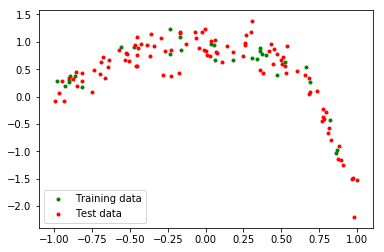

In [3]:
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, c='g', marker='.', label="Training data")
ax.scatter(x_test, y_test, c='r', marker='.', label="Test data")
ax.legend()
plt.show()

## Define function poly 
The `poly` function takes a vector $\mathbf{x}\in\mathbb{R}^D$ and a $K+1$-dimensional vector $\mathbf{w}$ as arguments, and returns the value of the $K$-th order polynomial: 
$$ f_K(\mathbf{x}) =  \langle \mathbf{w}_K, \phi_K(\mathbf{x})\rangle = w_0 + w_1 \mathbf{x} + w_2 \mathbf{x}^2 + \ldots + x_K \mathbf{x}^K $$

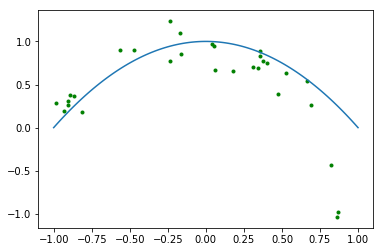

In [4]:
def poly(x, weight):
    # TODO: Question 1
    y = 0
    for i in range(len(weight)):
        y += weight[i]*pow(x,i);    
    # /TODO
    return y

# Visualize the function to check if it is correct.
w = [1, 0, -1]
x = np.linspace(-1.0, 1.0, num=100, endpoint=True)
y = poly(x, w)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.scatter(x_train, y_train, c='g', marker='.', label="Train data")
plt.show()

## Define embedding function

Now we need to define an embedding function that takes a vector $\mathbf{x}\in \mathbb{R}^D$ to a $D\times K+1$-dimensional space using the following expression:

$$\phi_K(\mathbf{x}) = \left[\begin{array}{c}\mathbf{1} & \mathbf{x} & \mathbf{x}^2 & \ldots & \mathbf{x}^K \end{array}\right]$$

$K$ should be an argument to the function. Keep in mind that we should also be able to apply the function to vectors. In other words, with an input vector $\mathbf{x} = [x_1, x_2, \ldots, x_N]^T$, the output should be the following array: 


$$\phi_K(\mathbf{x}) = \left[\begin{array}{cccc}
1 & x_1 & x_1^2 & \dots & x_1^K \\
1 & x_2 & x_2^2 & \dots & x_2^K \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_N & x_N^2 & \dots & x_N^K  
\end{array}\right]$$

In [21]:
# x is expected to be a numpy array of dimensions (N,)
def embedding_func(x, K):
    # TODO: Question 1
    row = K + 1
    col = len(x)
    F = np.zeros((row, col))
#     for i in range(row):
#         for j in range(K+1):
#             #   pow(x[i],j)
#             F[i][j] = (pow(x[i],j))
#not efficient should use numpy
    for i in range(row):
        F[i,:] = (x**i).T #x dxn col1 for data in N1
    
    F = F.T
    
    # /TODO
    return F

x = np.array([2, 3])
print(embedding_func(x, 4))

[[ 1.  2.  4.  8. 16.]
 [ 1.  3.  9. 27. 81.]]


## Define a function that fits a $K$-th order polynomial and returns a weight vector $\mathbf{w}$

The input arguments for the function are $(x,y,K)$ with $x,y\in\mathbb{R}^D$.

Optional tip: In python 3.6+ you can write `A @ B` to do matrix multiplication instead of `np.matmul(A, B)`.

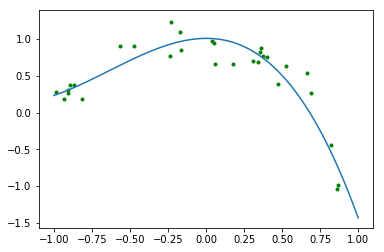

In [22]:
from numpy.linalg import inv

def estimate_w(y, X, K):
    # TODO: Question 1
    embeded_x = embedding_func(X, K)
    # w = inv(X.T * X^)*X.T*y, f' = 0 -> min
    w = inv((np.transpose(embeded_x)@embeded_x))@np.transpose(embeded_x)@y  
    # /TODO
    return w

w = estimate_w(y_train, x_train, 3)
x = np.linspace(-1.0, 1.0, num=100, endpoint=True)
y = poly(x, w)
fig, ax = plt.subplots()
ax.plot(x,y)
ax.scatter(x_train, y_train, c='g', marker='.', label="Train data")
plt.show()

## Fit 0-th to 10-th order polynomials to training data and plot resulting functions 




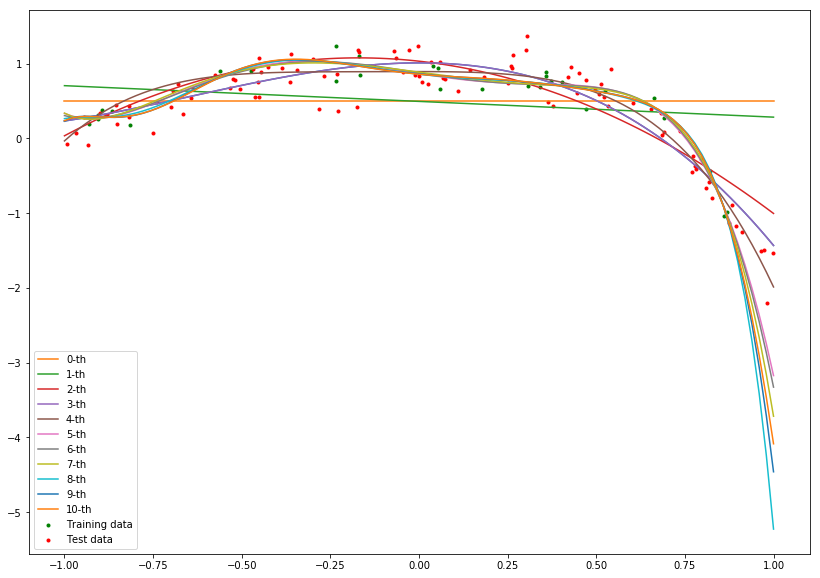

In [23]:
max_poly = 10

weights_store = list()

fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(x, y)
x = np.linspace(-1.0, 1.0, num=100, endpoint=True)
plt.scatter(x_train, y_train, c='g', marker='.', label="Training data")
plt.scatter(x_test, y_test, c='r', marker='.', label="Test data")

for poly_degree in range(max_poly+1):
    # TODO: Question 2
    # find the value of w which minimizes the error
    w = estimate_w(y_train, x_train, poly_degree)
    y = poly(x,w)
    
    # draw the curve and label the curve 
    plt.plot(x,y,label='%d-th'%(poly_degree))
    
    # /TODO
    
ax.legend()
plt.show()

## Compute the train and test error

Calculate the train and the test error given: 
\begin{equation}
E(f,\mathcal{S}) = \sum_i ||\mathbf{y}_i - f_K(\mathbf{x}_i)||^2
\end{equation}

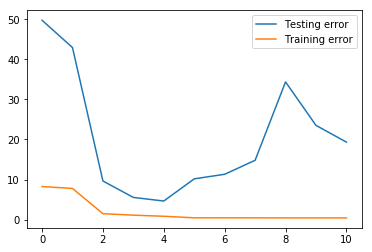

In [24]:
error_train = np.zeros(max_poly+1)
error_test = np.zeros(max_poly+1)

for poly_degree in range(max_poly+1):
    # TODO: Question 3
    # find the value of w which minimizes the error
    w = estimate_w(y_train, x_train, poly_degree)
    # calculate y
    y_estimated = poly(x_train,w)
    # use x_test to calculate corresponding y
    y_test_estimated = poly(x_test,w)
    
    error_train[poly_degree] = sum((y_train - y_estimated)**2)
    error_test[poly_degree] = sum((y_test - y_test_estimated)**2)

    # /TODO
    
fig, ax = plt.subplots()
ax.plot(error_test, label="Testing error")
ax.plot(error_train, label="Training error")
ax.legend()
plt.show()

The error of the training sample keep decresing as we increase the order of the polynomial.  The reason for this phenomenon is that higher order of the polynomial is able to fit the training data more accurately. However, as the order of the polynomial increases, the complexity of the function increases as well. This leads to the problem of overfitting.  As we can observe from the diagram above, the test error decreases unitil 4th order of the polynomial. After that, the test error starts increasing. Therefore, despite complex function can decrease the error of the training sample, they may have poor performance on some new data in the test dataset.

In [25]:
# TODO: Question 3 (Comment results)
# see above


# 2. Linear versus logistic regression (0.7 points)

In this section, we compare the robustness of linear and logistic regression. Linear regression has already been implemented for you. Please go through the code and comments comments before advancing to the remainder. 

As discussed in class, the merit function (or, criterion, $C$) driving logistic regression is:

\begin{eqnarray}
C(\mathbf{w}) = \sum_{i=1}^{N} y^i \log(g(\langle\mathbf{x}^i,\mathbf{w}\rangle)  + (1-y^i) \log(1-g(\langle\mathbf{x}^i,\mathbf{w}\rangle)).
\end{eqnarray}

Maximize this criterion for the provided dataset. Use Week 3 slides as a reference: we first need to compute the first and second order differentials, corresponding to $\nabla(\mathbf{w})$ and $H(\mathbf{w})$, respectively. 


1. (.4/.7) Implement the Newton-Raphson algorithm. This includes computing $\nabla(\mathbf{w})$ and $H(\mathbf{w})$ at every step. Consider that convergence is achieved when $||\mathbf{w}^{t} - \mathbf{w}^{t-1}|| < .001 ||\mathbf{w}^t||$

2. (.2/.7) Record the merit function $C(\mathbf{w}^t)$ at each Newton-Raphson iteration, so that it can be plotted.

3. (.1/.7) Compute and plot the boundary fitted by logistic regression. Compare the robustness of the fitted boundaries for the two experiments.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Data generation and visualization

In [34]:
def evaluate_linear_discriminant_on_grid(w_linear, loc_x, loc_y):
    grid_x, grid_y = np.meshgrid(loc_x, loc_y)
    sz_m, sz_n = grid_x.shape
    res = w_linear[0]*grid_x + w_linear[1]*grid_y + w_linear[2]

    return res, grid_x, grid_y

In [35]:
# Load the dataset
# Load the file data_lin_vs_log.pkl

with open('data_lin_vs_log.pkl', 'rb') as handle:
    data= pickle.load(handle)

test_features = data['test_features']
test_labels = data['test_labels']
train_features = data['train_features']
train_labels = data['train_labels']

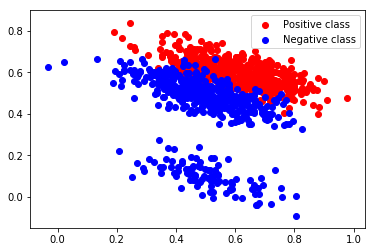

In [36]:
# Display your data
pos = np.nonzero(train_labels==1)[1]
neg = np.nonzero(train_labels!=1)[1]

fig, ax = plt.subplots()
ax.scatter(train_features[0, pos], train_features[1,pos], c="r", label="Positive class")
ax.scatter(train_features[0, neg], train_features[1,neg], c="b", label="Negative class")
ax.legend(loc=1)
plt.show()

## Linear Regression

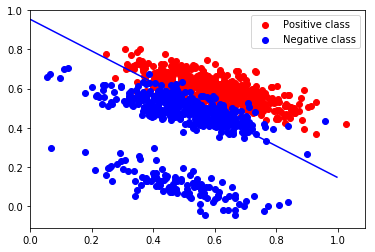

In [37]:
##---------------------------------------------------------------
## First part - (done for you)
##---------------------------------------------------------------

## Train a linear classifier

## in slide 31, Lecture 1, X was (Ndata x Ndimensions), Y was (Ndata x 1)
## Now the size of train_features is Ndimensions x Ndata and of Y is 1 x Ndata
## so we transpose train_features and train_data to get X and Y respectively
X = train_features.T
Y = train_labels.T

##  form X^T X
XX = np.dot(X.T, X)

##  form X^T Y
YX = np.dot(X.T, Y)

##  solve   w  = (X^T X)^{-1}  (X^T Y)
w = np.linalg.solve(XX, YX)

## visualize classifier
fig, ax = plt.subplots()
## step 1: get its value over a regular grid of positions
loc_x = np.arange(0, 1.01, .01)
loc_y = np.arange(0, 1.01, .01)
function_values, grid_x, grid_y = evaluate_linear_discriminant_on_grid(w, loc_x, loc_y)

## step 2: plot the set of positions where its value equals .5
contour_values = [.5]
contPlt = ax.contour(grid_x, grid_y, function_values, contour_values, cmap=plt.cm.winter)

## step 3: superimpose the points of the test set
pos = np.nonzero(test_labels==1)[1]
neg = np.nonzero(test_labels!=1)[1]

ax.scatter(test_features[0, pos], test_features[1, pos], c="r", label="Positive class")
ax.scatter(test_features[0, neg], test_features[1, neg], c="b", label="Negative class")
ax.legend(loc=1)
plt.show()

## Logistic regression

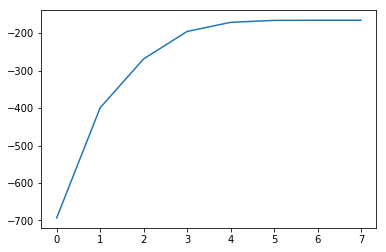

In [40]:
##---------------------------------------------------------------
## Second part -  logistic regression 
##---------------------------------------------------------------
w = np.array([[0], [0], [0]]) # Initialize w (dx1)
merits = []
while 1: # Continue until converge criterion is met
    # TODO (Question 1 and 2)
    # X was (Ndata x Ndimensions)
    # h_w (Nx1)
    h_w = X@w;
    # define one of the posterior probability 
    # (NX1)
    g = 1/(1+np.exp(-h_w))
    
    
    # Y was (Ndata x 1)
    # h_w was Nx1
    # 1x1
    temp = np.transpose(Y)@(np.log(g))+(1-np.transpose(Y))@np.log(1-g)
    # record the value of merit function
    merits.append(temp[0][0])
    
    # trying to minimize error function 
    # week 2 P117
    # gradient 1xd
    gradient = -np.transpose(Y - g)@X
    # R matrix (NX1)-> NXN
    R_ii = g*(1-g)
    # diag matrix
#     R = np.eye(len(X))
#     for i in range(len(X)):
#         R[i][i] = R_ii[i][0];
    R = np.diagflat(R_ii)
    #np.diagflat(X)
    # It use the input vector x to be the element on diagnal
    #more efficicent to use diag()
    # hessian dxd
    hessian = np.transpose(X)@R@X
    
    
    # update value dx1
    update = inv(hessian)@np.transpose(gradient)
    w_old = w
    w = w - update
    
    if(np.linalg.norm(w-w_old))<0.001*np.linalg.norm(w):
        break
    # /TODO

fig, ax = plt.subplots()
ax.plot(merits)
plt.show()

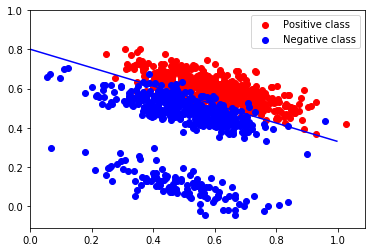

In [51]:
# TODO: Question 3
## visualize classifier
fig, ax = plt.subplots()
## Step 1: get its value over a regular grid of positions
loc_x = np.arange(0, 1.01, .01)
loc_y = np.arange(0, 1.01, .01)
function_values, grid_x, grid_y = evaluate_linear_discriminant_on_grid(w, loc_x, loc_y)


########make a mistake here#######
##I need to apply the sigmoid function to all the function values
## see the comments in moodle A2 Q6
function_sigmoid = 1/(1+np.exp(-function_values))
## Step 2: plot the set of positions where its value equals .5
contPlt = ax.contour(grid_x, grid_y, function_sigmoid, 0.5, cmap=plt.cm.winter)
# /TODO

## Step 3: superimpose the points of the test set
pos = np.nonzero(test_labels==1)[1]
neg = np.nonzero(test_labels!=1)[1]

ax.scatter(test_features[0, pos], test_features[1, pos], c="r", label="Positive class")
ax.scatter(test_features[0, neg], test_features[1, neg], c="b", label="Negative class")

ax.legend(loc=1)
plt.show()

In [42]:
# TODO :Question 3 (Comment results)

For the linear regression, the goal is to minimize the quadratic error which relates to the distance bewtween the ground truth and the predicted value.  The problem of using linear regression for classification is that the quadratic loss function is not robust to outliers and penalizes outputs which are classified by the classifier with high confidence.

Logistic regression is more robust. As we employ the sigmoid function to the output value in the logistic regression, the modified output values are limited in the range (0,1). Higher output values means that the data has higher probability of belonging to the positive class. Therefore, the classifier will classify the data according to the calculated probability.
